# Checkpoint
Run these cells to restore previous state.

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from fastai import *
from fastai.tabular import *

In [14]:
from pathlib import Path

path = Path('~/data_work/wine_review_analysis')

In [15]:
data_path = path/'wine-reviews'

wine_data = pd.read_csv(data_path/'winemag-data-130k-v2.csv')

In [16]:
clean_wine_data = wine_data[wine_data['price'].notna()]

In [17]:
procs = [FillMissing, Categorify, Normalize]

In [18]:
valid_idx = range(len(clean_wine_data)-int(len(clean_wine_data)*.2), len(clean_wine_data))



In [19]:
clean_wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [20]:
test_vars = ['country', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name',
       'variety', 'winery']
model_data = clean_wine_data[test_vars]
model_data.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'variety', 'winery'],
      dtype='object')

In [21]:
dep_var = 'price'
cat_names = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'taster_name', 'winery']



In [35]:
data = TabularDataBunch.from_df(path, model_data, dep_var
                                , valid_idx=valid_idx, procs=procs, cat_names=cat_names
                                , bs = 1000)




In [23]:
from fastai.metrics import mean_squared_error

In [36]:
learn = tabular_learner(data, layers=[200,100], metrics=mean_squared_error)



In [27]:
data.batch_size??

In [32]:
data.train_dl.batch_size

200

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


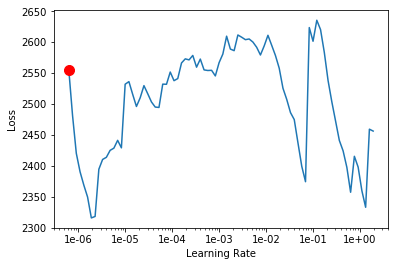

In [38]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(20, 1e-5)

epoch,train_loss,valid_loss,mean_squared_error
1,2846.940186,3064.652100,3064.652100
2,2742.153320,3060.894531,3060.894287
3,2791.140869,3052.318604,3052.318604
4,2850.196777,3040.751953,3040.751465
5,2822.732178,3026.093994,3026.093750
6,2835.636719,3014.980957,3014.981201
7,2919.951904,2999.121094,2999.121094
8,2721.116211,2992.788818,2992.788330
9,2796.652344,2982.403076,2982.403076
10,2740.914307,2971.276123,2971.276123


In [1]:
import fastai

In [2]:
fastai.__version__

'1.0.45'

In [6]:
from fastai import *

In [7]:
dir(fastai)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'version']

In [9]:
fastai.metrics.__all__

['error_rate',
 'accuracy',
 'accuracy_thresh',
 'dice',
 'exp_rmspe',
 'fbeta',
 'FBeta',
 'mse',
 'mean_squared_error',
 'mae',
 'mean_absolute_error',
 'rmse',
 'root_mean_squared_error',
 'msle',
 'mean_squared_logarithmic_error',
 'explained_variance',
 'r2_score',
 'top_k_accuracy',
 'KappaScore',
 'ConfusionMatrix',
 'MatthewsCorreff',
 'Precision',
 'Recall',
 'R2Score',
 'ExplainedVariance',
 'ExpRMSPE',
 'RMSE']